<a href="https://colab.research.google.com/github/ravising-h/One-Fourth-Labs/blob/master/Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ravising-h/One-Fourth-Labs)


In this notebook, I am working on Internship Task of One Fourth Labs. I am provided with Extended MNIST Dataset. This is First Task's Notebook.



## Task 1: Letter/Digit Classifier
Given an image, you must be able to classify whether the image is a letter or a digit.

Expected outcome: You are expected to use a ML-based model (like CNNs, etc.) to solve the problem with a reasonably high accuracy.

You are given a dataset containing 28x28 grayscale images. Each image is either a handwritten letter or digit. The dataset is present as a CSV file. You’ll find two CSV files: Train-set and Test-set. You are supposed to train only using the train-set and use test-set only for calculating accuracy.

In [1]:
## IMAGE PROCESSING
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt # Plotting Graphsand Image
from math import floor # Round OFF
import seaborn as sns # Plotting
import base64 # CODING
from bokeh.plotting import figure
from bokeh.io import show, output_notebook

## UTILS
import random # generating Random Number
import warnings # Removing Warnings
warnings.filterwarnings('ignore')
from keras.preprocessing.image import ImageDataGenerator # Data Augumentation
from tqdm import tqdm # ProgressBar
from IPython.display import HTML # Dataset Download

## MODELS
from keras.layers import Input,Conv2D,Dense, Dropout, BatchNormalization, MaxPool2D, Activation, Flatten, AvgPool2D,GlobalMaxPooling2D # KERAS LAYERS
from keras.layers import  BatchNormalization as btn # BatchNormalization
from keras.regularizers import l2
from keras.models import Model, Sequential  #model
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from keras.callbacks import LearningRateScheduler
from keras.optimizers import Adam

Using TensorFlow backend.


In [2]:
!nvidia-smi

Sun Nov 17 11:23:54 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 430.50       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   72C    P8    33W / 149W |      0MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
# Input data files are available in the  directory.
import os
print("Files in the Dataset:-")
for dirname, _, filenames in os.walk("/content/drive/My Drive/Character + Digits data"):
    for filename in filenames:
        print( os.path.join(dirname, filename))

Files in the Dataset:-
/content/drive/My Drive/Character + Digits data/characters-digits-mapping.txt
/content/drive/My Drive/Character + Digits data/Readme.txt
/content/drive/My Drive/Character + Digits data/characters-digits-test.csv
/content/drive/My Drive/Character + Digits data/characters-digits-train.csv
/content/drive/My Drive/Character + Digits data/utils.py
/content/drive/My Drive/Character + Digits data/Model_0_V1.h5
/content/drive/My Drive/Character + Digits data/build_model.py
/content/drive/My Drive/Character + Digits data/model_0_V2.h5
/content/drive/My Drive/Character + Digits data/model_0_V1.h5
/content/drive/My Drive/Character + Digits data/Task1.ipynb
/content/drive/My Drive/Character + Digits data/TrainingBasicModel.ipynb
/content/drive/My Drive/Character + Digits data/__pycache__/utils.cpython-36.pyc
/content/drive/My Drive/Character + Digits data/__pycache__/build_model.cpython-36.pyc


In [5]:
%cd /content/drive/My Drive/Character + Digits data/

/content/drive/My Drive/Character + Digits data


In [0]:
from utils import *

In [0]:
train_csv = pd.read_csv('characters-digits-train.csv',header=None)
test_csv = pd.read_csv('characters-digits-test.csv',header=None)

In [8]:
train_csv.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784
0,45,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,43,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


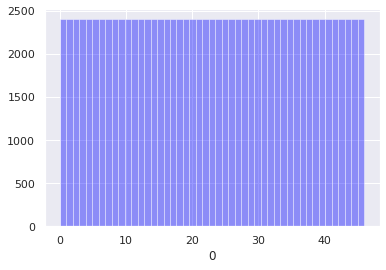

In [9]:
sns.set(color_codes=True)
sns.distplot(train_csv.iloc[:,0],label = 'LABELS',kde=False
             ,color='blue',norm_hist=False);

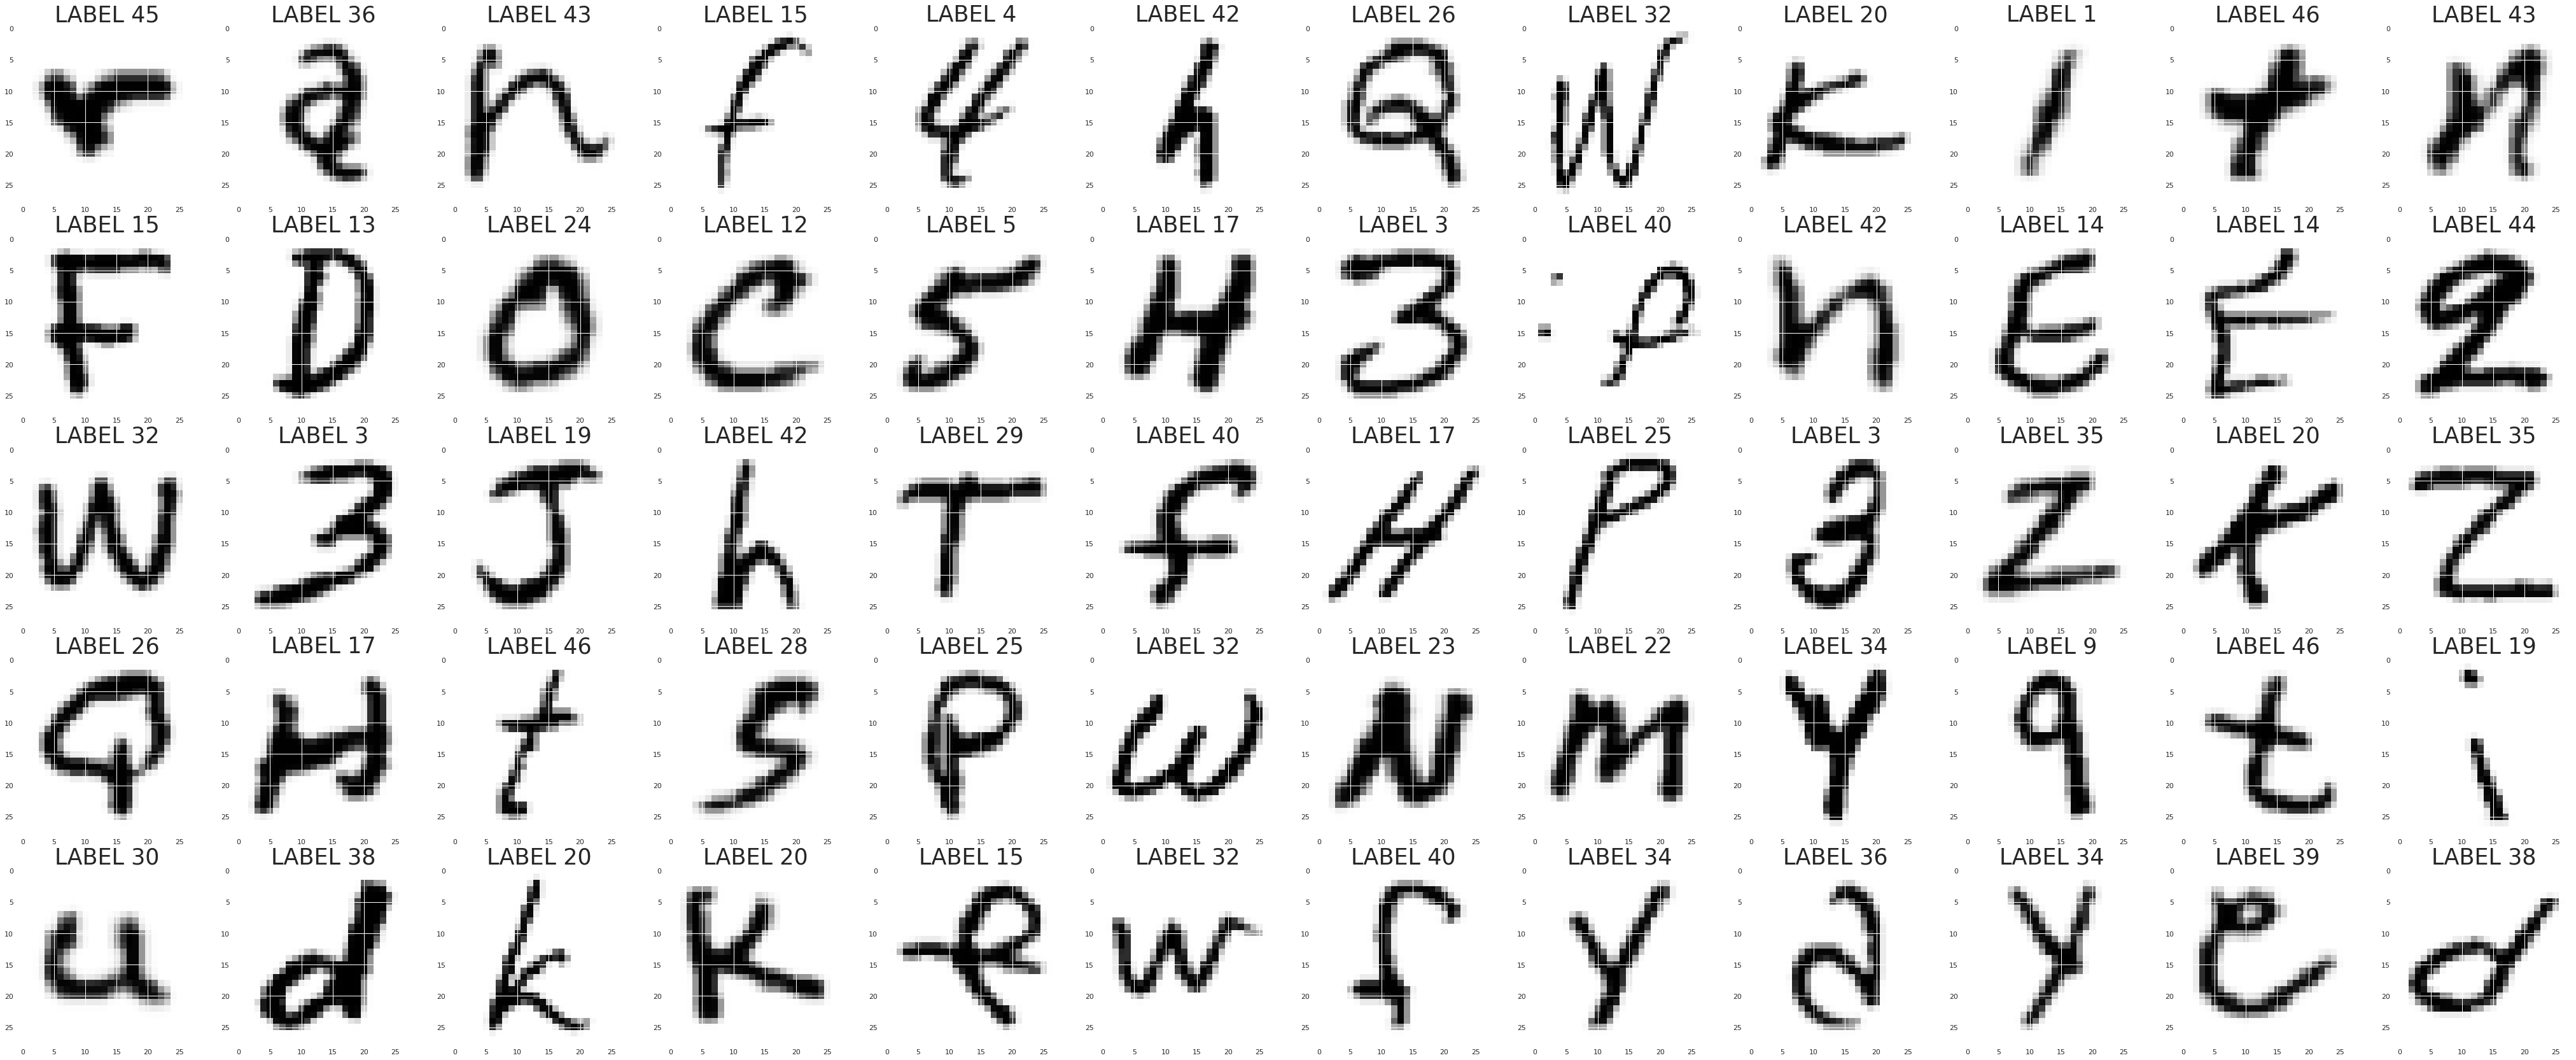

In [10]:
size_of_img = (int(np.sqrt(train_csv.shape[1])),int(np.sqrt(train_csv.shape[1])))
fig=plt.figure(figsize=(72,72))
for i in range(60):
    ax=fig.add_subplot(12,12,i+1)
    plot_image = np.array(train_csv.iloc[i,1:]).reshape(size_of_img)
    ax.imshow(np.fliplr(np.rot90(plot_image,3)),cmap='Greys')
    ax.set_title('LABEL ' + str(train_csv.iloc[i,0]),fontsize= 35)
plt.show()

In [12]:
train_feature, train_labels, dev_feature, dev_labels,_,__ = dataset_distribution(train_csv,[80,20,0]) ### IT GIVES NORMALIZE DATA.
train_feature.shape, train_labels.shape, dev_feature.shape, dev_labels.shape

((90240, 784), (90240,), (22560, 784), (22560,))

In [0]:
train_labelsLD,dev_labelsLD = labelToDigitLetters(train_labels), labelToDigitLetters(dev_labels)

In [0]:
train_image = change_to_image(train_feature)
dev_image   = change_to_image(dev_feature)

In [0]:
train_labelenLD = one_hot_encoding(train_labels)
dev_labelenLD   = one_hot_encoding(dev_labels)

In [16]:

no_of_class = 2
print("no_of_class : ",no_of_class)
print("train_image.shape : ",train_image.shape)
print("dev_image.shape : ",dev_image.shape)
print("train_label.shape : ",train_labelenLD.shape)
print("dev_label.shape: ",dev_labelenLD.shape)
print("train_feature: ",train_feature.shape)
print("train_labels.shape : ",train_labels.shape)
print("train_feature: ",dev_feature.shape)
print("train_labels.shape : ",dev_labels.shape)

no_of_class :  2
train_image.shape :  (90240, 28, 28, 1)
dev_image.shape :  (22560, 28, 28, 1)
train_label.shape :  (90240, 47)
dev_label.shape:  (22560, 47)
train_feature:  (90240, 784)
train_labels.shape :  (90240,)
train_feature:  (22560, 784)
train_labels.shape :  (22560,)


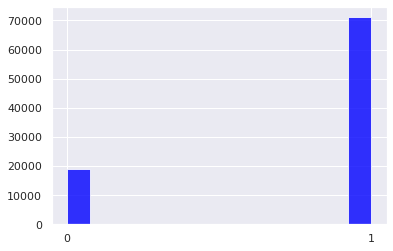

In [17]:
plt.hist(train_labelsLD , 13, facecolor='blue', alpha=0.8)
plt.xticks([0,1])
plt.show()

In [19]:

model = Sequential()

model.add(Conv2D(128, kernel_size = 3, activation='relu', input_shape = (28, 28, 1)))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size = 3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size = 5, strides=2, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size = 3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, kernel_size = 3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, kernel_size = 5, strides=2, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.44))

model.add(Conv2D(1024, kernel_size = 3, activation='relu'))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dropout(0.44))
#mode.add(Dense(64,activation = 'relu'))
model.add(Dense(47, activation='softmax'))


# COMPILE WITH ADAM OPTIMIZER AND CROSS ENTROPY COST
model.compile(optimizer='RMSprop', loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()
model.load_weights("model/model_0_V1.h5")
y_pred = np.argmax(model.predict(train_image),axis = 1)












Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 128)       1280      
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 128)       512       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 128)       147584    
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 128)       512       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 128)       409728    
_________________________________________________________________
batch_normalization_3 (Batch (None, 12, 12, 128)       512

Recall: [0.7012513  0.31152648 0.86244204 0.98843931 0.95387063 0.93225638
 0.89947917 0.98463983 0.9146278  0.93014706 0.98100264 0.98339388
 0.96788991 0.96046389 0.97631579 0.62688116 0.97160243 0.96915839
 0.65875065 0.95395081 0.96670135 0.73849372 0.99279465 0.97775424
 0.63505894 0.97379239 0.97746331 0.98810755 0.92444911 0.9671875
 0.93977155 0.9373395  0.99215071 0.96666667 0.91889117 0.94984488
 0.93191268 0.95816116 0.98610396 0.95068206 0.70542636 0.75668589
 0.97866805 0.87604167 0.46026832 0.96019108 0.91009464]
Precision: [0.65866797 0.64446831 0.94416244 0.98533263 0.92209124 0.93274244
 0.96642417 0.97893628 0.97394678 0.66032811 0.96471199 0.95562279
 0.96739684 0.95243074 0.98670213 0.70560748 0.91718526 0.97068063
 0.68089648 0.96099104 0.97892518 0.48306534 0.95447798 0.94715239
 0.70357751 0.97932817 0.93671522 0.96223565 0.92590646 0.92942943
 0.93347086 0.94953174 0.95757576 0.98682766 0.9146653  0.87102892
 0.92565823 0.9321608  0.97805003 0.97787372 0.6603773

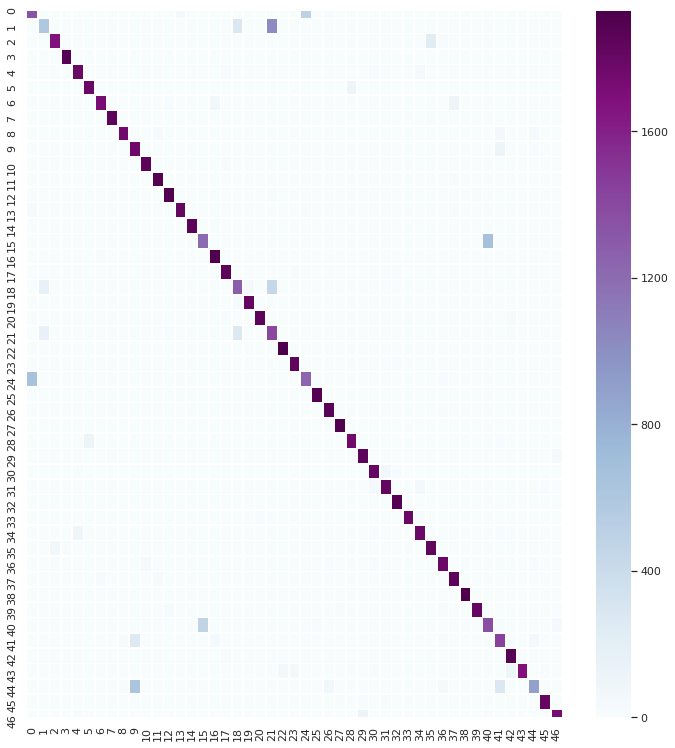

In [21]:
acc(train_labels,y_pred,cmap = "BuPu")

In [0]:
from sklearn import tree

In [0]:
clf = tree.DecisionTreeClassifier(max_depth=3)

In [64]:
train_labels.shape,y_pred.shape

((90240,), (90240,))

In [65]:
clf.fit(y_pred.reshape(-1,1),train_labelsLD.reshape(-1,1))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [0]:
y_pred_D = np.argmax(model.predict(dev_image),axis = 1)

Recall: [0.85473943 0.9654529 ]
Precision: [0.87209546 0.9601867 ]

 clasification report:
               precision    recall  f1-score   support

           0       0.87      0.85      0.86      4874
           1       0.96      0.97      0.96     17686

    accuracy                           0.94     22560
   macro avg       0.92      0.91      0.91     22560
weighted avg       0.94      0.94      0.94     22560


 confussion matrix:
 [[ 4166   708]
 [  611 17075]]


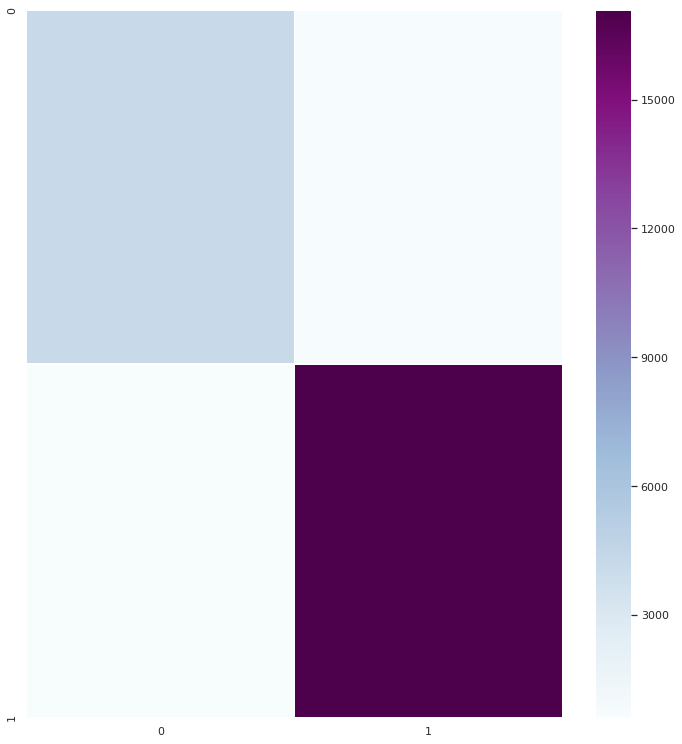

In [67]:
y = clf.predict(y_pred_D.reshape(-1,1))
acc(dev_labelsLD.reshape(-1,1),y,"BuPu")

In [0]:
def predict(model,clf,test_csv):
  if type(test_csv) is str:
    test_csv = pd.read_csv(test_csv,header=None)
  test_feature, test_labels,_,_,_,_ = dataset_distribution(test_csv,[100,0,0])
  print("Shape of feature and labels are:- ",test_feature.shape, test_labels.shape)
  test_labelsLD= labelToDigitLetters(test_labels)
  test_image = change_to_image(test_feature)
  test_labelenLD = one_hot_encoding(test_labels)
  y_pred_D = np.argmax(model.predict(test_image),axis = 1)
  y = clf.predict(y_pred_D.reshape(-1,1))
  acc(test_labelsLD.reshape(-1,1),y,"BuPu")
  print("Accuracy is :- ",accuracy_score(test_labelsLD.reshape(-1,1),y))
  index = np.arange(test_labels.shape[0]).reshape(-1,1)
  y = y.reshape(-1,1)
  data = pd.DataFrame(np.concatenate((index,y),axis = 1))
  data.to_csv("result_Task1.csv",index = None,header = ["index","Y"])
  

Shape of feature and labels are:-  (18800, 784) (18800,)
Recall: [0.84575    0.96331081]
Precision: [0.86169129 0.95851822]

 clasification report:
               precision    recall  f1-score   support

           0       0.86      0.85      0.85      4000
           1       0.96      0.96      0.96     14800

    accuracy                           0.94     18800
   macro avg       0.91      0.90      0.91     18800
weighted avg       0.94      0.94      0.94     18800


 confussion matrix:
 [[ 3383   617]
 [  543 14257]]
Accuracy is :-  0.9382978723404255


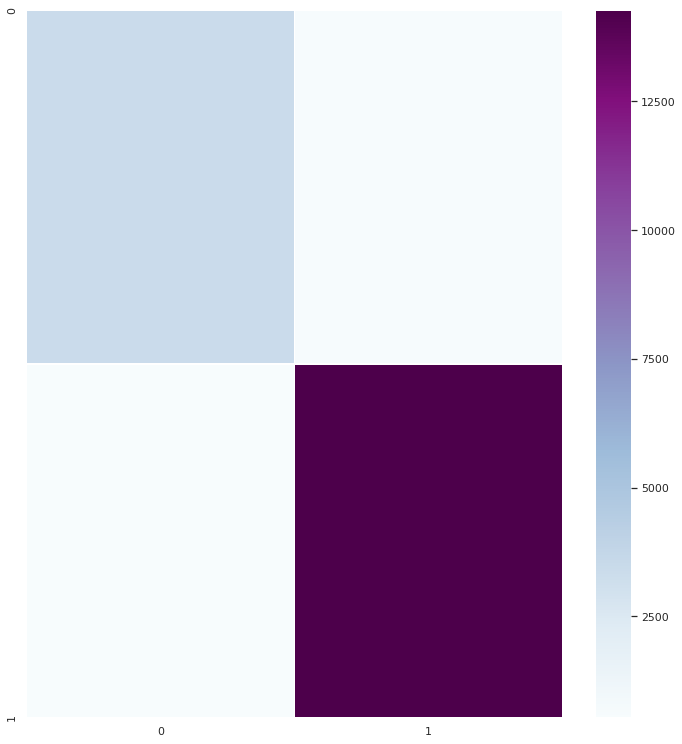

In [69]:
predict(model,clf,test_csv)

In [0]:
import pickle
with open("model/NumLetterClf.pkl","wb") as file:
  ss = pickle.dumps(clf)
  file.write(ss)

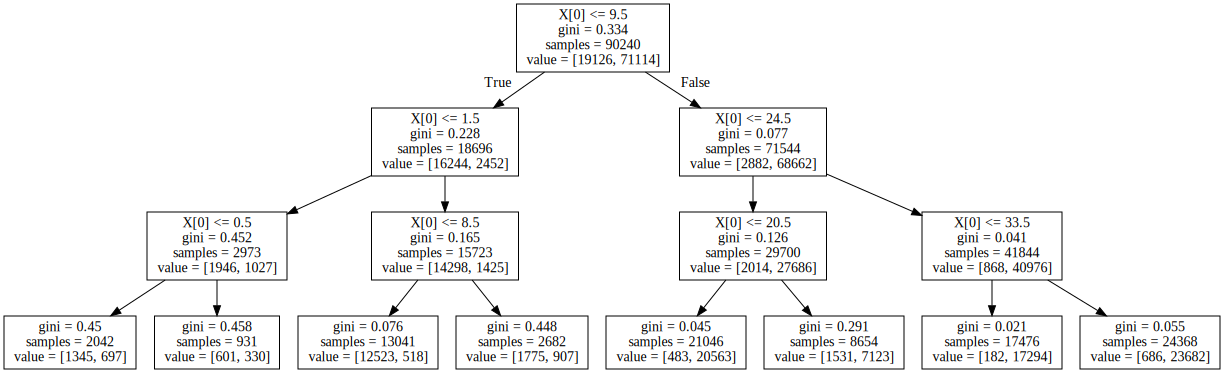

In [75]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("clf")
graph